<a href="https://colab.research.google.com/github/zahid342/final_year_project_zahid/blob/main/Topic_09_Done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load and inspect the dataset**

In [1]:
%pip install gensim

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Read the dataset (adjust filename if needed)
df = pd.read_csv("/content/Phishing_Email.csv")  # replace 'emails.csv' if actual file name is different

# Preview
print("Shape:", df.shape)
df.head()


Shape: (18650, 3)


,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


# **Check for missing values and data types**

In [3]:
# Check data types
print(df.dtypes)

# Null value count
print("\nMissing values:\n", df.isnull().sum())


Unnamed: 0     int64
Email Text    object
Email Type    object
dtype: object

Missing values:
 Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64


 # **Preprocess the dataset**

In [4]:
# Preprocess the dataset
df = df.rename(columns={"Email Text": "email_text", "Email Type": "label"})

df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df

,email_text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email
...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email
18646,request submitted : access request for anita ....,Safe Email
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email
18648,press clippings - letter on californian utilit...,Safe Email


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n+', ' ', text)                      # Remove newlines
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)   # Remove URLs
    text = re.sub(r'\d+', '', text)                       # Remove digits
    text = re.sub(r'[^\w\s]', '', text)                   # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()              # Remove extra spaces
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
df['clean_text'] = df['email_text'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [7]:
df['clean_text']

,clean_text
0,disc uniformitarianism sex lang dick hudson ob...
1,side galicismos galicismo spanish term name im...
2,equistar deal ticket still available assist ro...
3,hello hot lil horny toy one dream open minded ...
4,software incredibly low price lower drapery se...
...,...
18645,date lonely housewife always wanted date lonel...
18646,request submitted access request anita dupont ...
18647,important prc mtg hi dorn john discovered rece...
18648,press clipping letter californian utility plea...


In [8]:
df['text_length'] = df['clean_text'].apply(len)
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

In [9]:
df

,email_text,label,clean_text,text_length,word_count
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,disc uniformitarianism sex lang dick hudson ob...,571,82
1,the other side of * galicismos * * galicismo *...,Safe Email,side galicismos galicismo spanish term name im...,312,41
2,re : equistar deal tickets are you still avail...,Safe Email,equistar deal ticket still available assist ro...,690,115
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,hello hot lil horny toy one dream open minded ...,325,45
4,software at incredibly low prices ( 86 % lower...,Phishing Email,software incredibly low price lower drapery se...,357,57
...,...,...,...,...,...
18645,date a lonely housewife always wanted to date ...,Phishing Email,date lonely housewife always wanted date lonel...,173,24
18646,request submitted : access request for anita ....,Safe Email,request submitted access request anita dupont ...,328,48
18647,"re : important - prc mtg hi dorn & john , as y...",Safe Email,important prc mtg hi dorn john discovered rece...,748,104
18648,press clippings - letter on californian utilit...,Safe Email,press clipping letter californian utility plea...,180,23


/tmp/ipython-input-10-2907696289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='pastel')


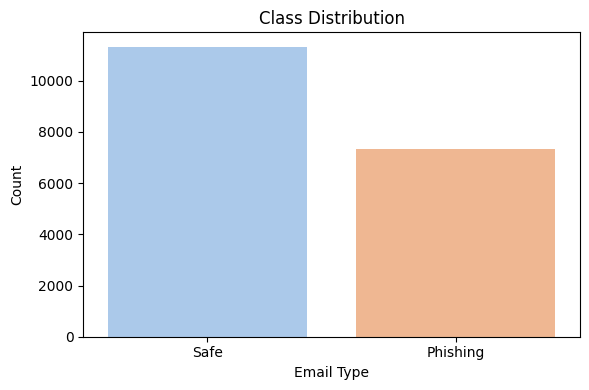

In [10]:
# Plot 1: Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='pastel')
plt.title("Class Distribution")
plt.xticks([0, 1], ['Safe', 'Phishing'])
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

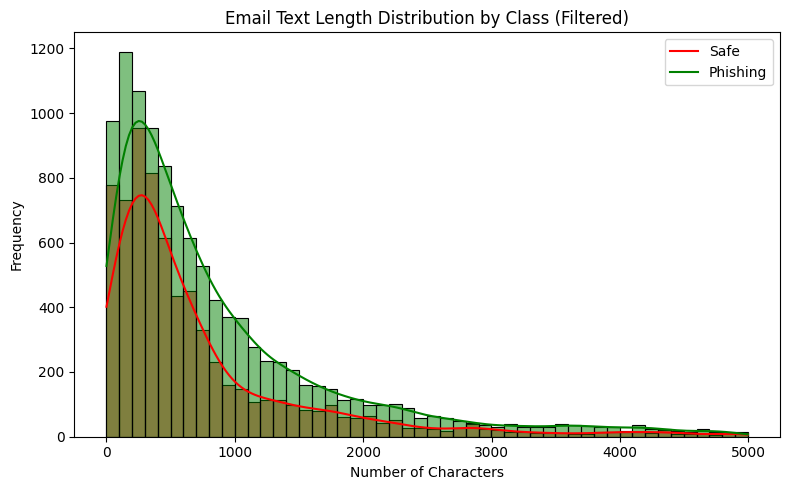

In [11]:
# Filter out outliers with text length > 5000 characters
df_filtered = df[df['text_length'] < 5000]

plt.figure(figsize=(8, 5))
sns.histplot(data=df_filtered, x='text_length', hue='label', bins=50, kde=True, palette=['green', 'red'])
plt.title("Email Text Length Distribution by Class (Filtered)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.legend(labels=['Safe', 'Phishing'])
plt.tight_layout()
plt.show()



/tmp/ipython-input-12-3586836757.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=df_filtered, palette='Set2')


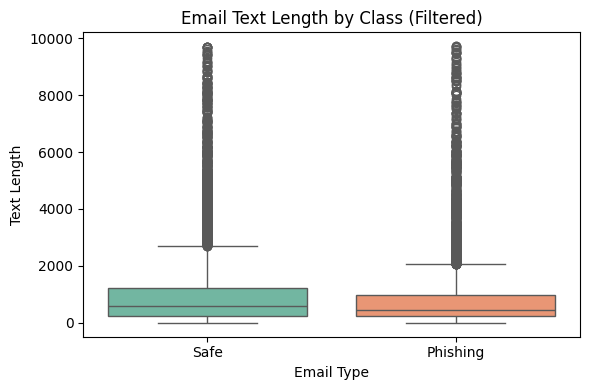

In [12]:


# Filter extreme outliers based on 99th percentile
max_length = df['text_length'].quantile(0.99)
df_filtered = df[df['text_length'] < max_length]

# Plot boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='text_length', data=df_filtered, palette='Set2')
plt.title("Email Text Length by Class (Filtered)")
plt.xticks([0, 1], ['Safe', 'Phishing'])
plt.xlabel("Email Type")
plt.ylabel("Text Length")
plt.tight_layout()
plt.show()



/tmp/ipython-input-13-890974522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='word_count', data=df_filtered, palette='Set3')


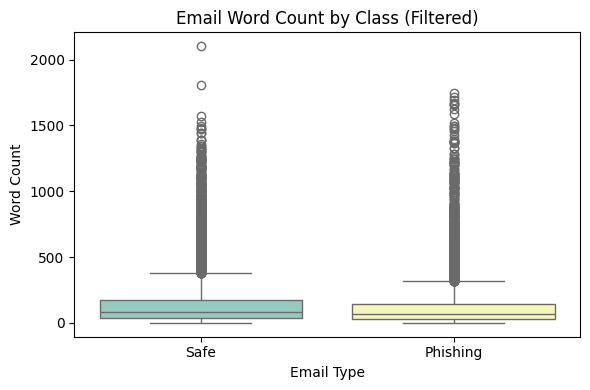

In [13]:
# Plot boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='word_count', data=df_filtered, palette='Set3')
plt.title("Email Word Count by Class (Filtered)")
plt.xticks([0, 1], ['Safe', 'Phishing'])
plt.xlabel("Email Type")
plt.ylabel("Word Count")
plt.tight_layout()
plt.show()

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 10}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2264
           1       0.94      0.97      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



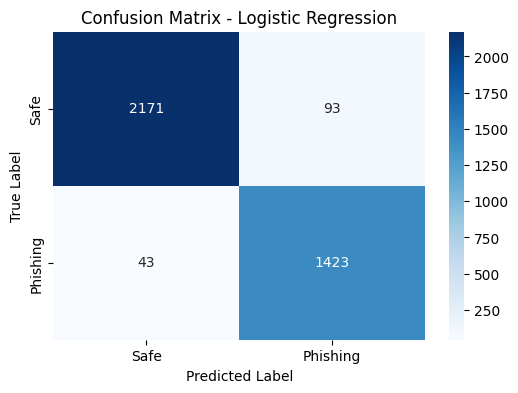

Training Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2264
           1       0.93      0.96      0.95      1466

    accuracy                           0.96      3730
   macro avg       0.95      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



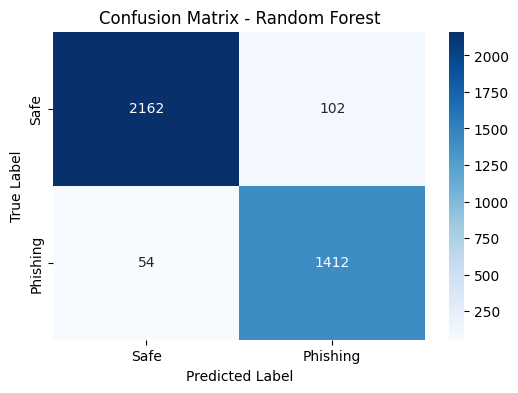

Training Naive Bayes...
Best parameters for Naive Bayes: {'alpha': 0.5}

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2264
           1       0.93      0.93      0.93      1466

    accuracy                           0.95      3730
   macro avg       0.94      0.95      0.94      3730
weighted avg       0.95      0.95      0.95      3730



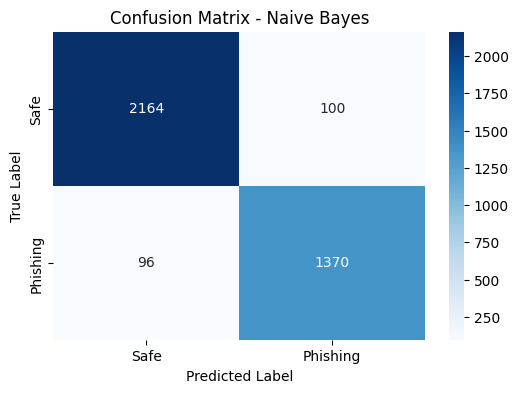

Training KNN...
Best parameters for KNN: {'n_neighbors': 3}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      0.32      0.48      2264
           1       0.49      1.00      0.65      1466

    accuracy                           0.59      3730
   macro avg       0.74      0.66      0.57      3730
weighted avg       0.79      0.59      0.55      3730



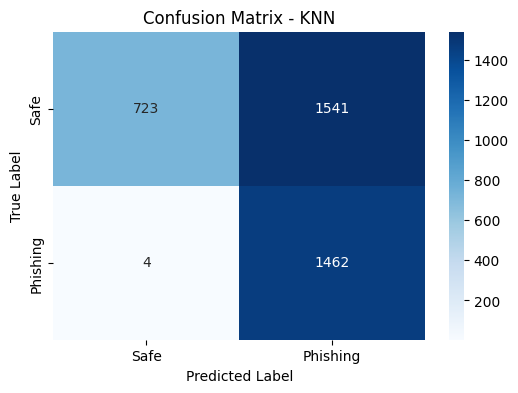

Training Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2264
           1       0.87      0.91      0.89      1466

    accuracy                           0.91      3730
   macro avg       0.91      0.91      0.91      3730
weighted avg       0.91      0.91      0.91      3730



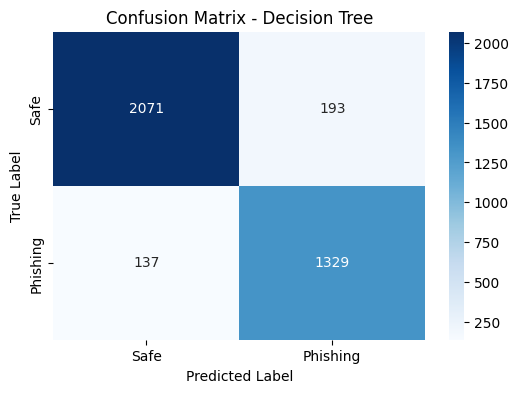

Training Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2264
           1       0.93      0.91      0.92      1466

    accuracy                           0.94      3730
   macro avg       0.94      0.94      0.94      3730
weighted avg       0.94      0.94      0.94      3730



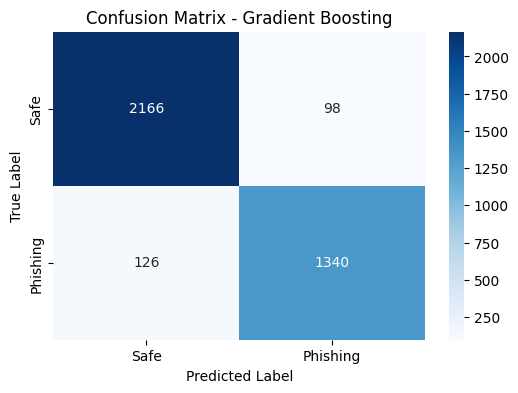

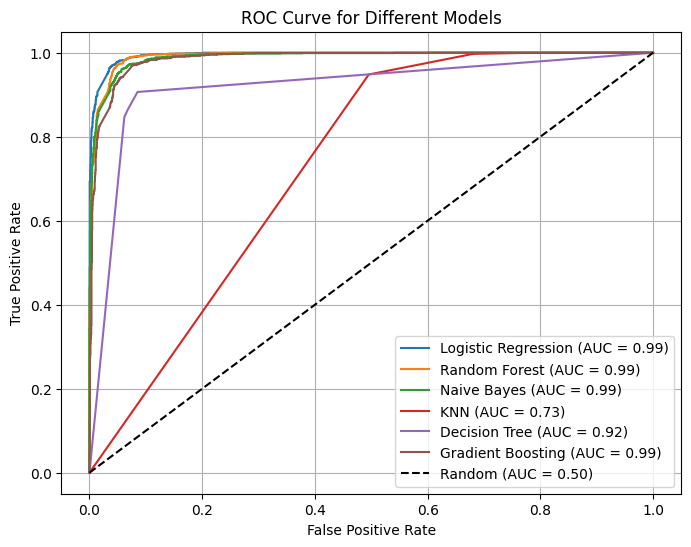


Training and Testing Times:
------------------------------
Logistic Regression: Training Time = 2.6807s, Testing Time = 0.0021s
Random Forest: Training Time = 135.2068s, Testing Time = 0.5994s
Naive Bayes: Training Time = 0.3216s, Testing Time = 0.0060s
KNN: Training Time = 17.7020s, Testing Time = 5.4052s
Decision Tree: Training Time = 28.5368s, Testing Time = 0.0052s
Gradient Boosting: Training Time = 519.1624s, Testing Time = 0.0294s


In [14]:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and preprocessed with a 'clean_text' column

# Split data
X = df['clean_text']
# Fix: Ensure correct label encoding
y = df['label'].apply(lambda x: 1 if x == 'Phishing Email' else 0) # Encode labels numerically
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Dictionary to store results
results = {}

# Define models and their parameter grids for hyperparameter tuning
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.1, 1, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
    },
    'Naive Bayes': {
        'model': MultinomialNB(),
        'params': {'alpha': [0.1, 0.5, 1.0]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

# Train and evaluate each model
for name, config in models.items():
    print(f"Training {name}...")
    model = config['model']
    params = config['params']

    # Hyperparameter Tuning with GridSearchCV
    start_time_train = time.time()
    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_tfidf, y_train)
    end_time_train = time.time()
    train_time = end_time_train - start_time_train

    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Prediction and Evaluation
    start_time_test = time.time()
    y_pred = best_model.predict(X_test_tfidf)
    y_prob = best_model.predict_proba(X_test_tfidf)[:, 1] # Probabilities for ROC curve
    end_time_test = time.time()
    test_time = end_time_test - start_time_test

    # Store results
    results[name] = {
        'best_model': best_model,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_test': y_test,
        'y_prob': y_prob,
        'train_time': train_time,
        'test_time': test_time
    }

    # Print classification report
    print(f"\nClassification Report for {name}:\n{results[name]['classification_report']}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
for name, res in results.items():
    fpr, tpr, _ = roc_curve(res['y_test'], res['y_prob'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.grid(True)
plt.show()

# Compare Training and Testing Times
print("\nTraining and Testing Times:")
print("-" * 30)
for name, res in results.items():
    print(f"{name}: Training Time = {res['train_time']:.4f}s, Testing Time = {res['test_time']:.4f}s")

Training Logistic Regression with Word2Vec features...
Best parameters for Logistic Regression: {'C': 10}

Classification Report for Logistic Regression (Word2Vec):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2264
           1       0.92      0.95      0.94      1466

    accuracy                           0.95      3730
   macro avg       0.94      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730



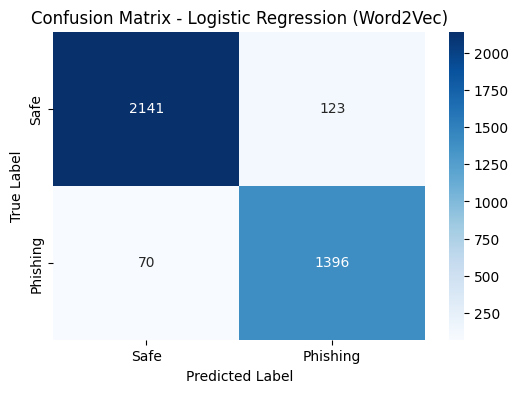

Training Random Forest with Word2Vec features...
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}

Classification Report for Random Forest (Word2Vec):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2264
           1       0.93      0.95      0.94      1466

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.96      0.95      0.96      3730



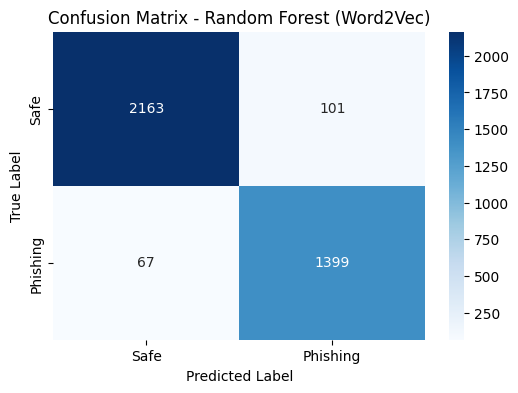

Training KNN with Word2Vec features...
Best parameters for KNN: {'n_neighbors': 5}

Classification Report for KNN (Word2Vec):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2264
           1       0.93      0.95      0.94      1466

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730



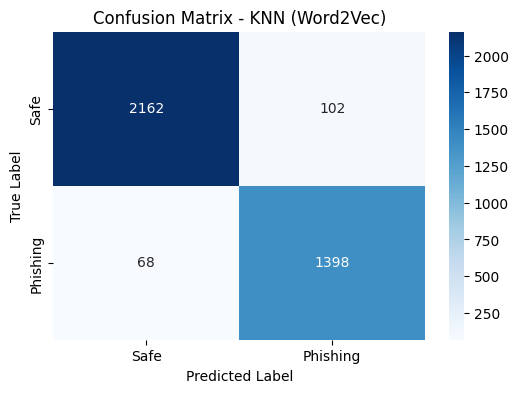

Training Decision Tree with Word2Vec features...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report for Decision Tree (Word2Vec):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2264
           1       0.88      0.91      0.90      1466

    accuracy                           0.92      3730
   macro avg       0.91      0.92      0.91      3730
weighted avg       0.92      0.92      0.92      3730



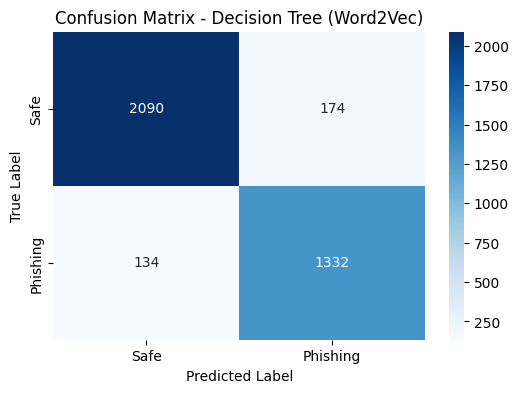

Training Gradient Boosting with Word2Vec features...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}

Classification Report for Gradient Boosting (Word2Vec):
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2264
           1       0.93      0.95      0.94      1466

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730



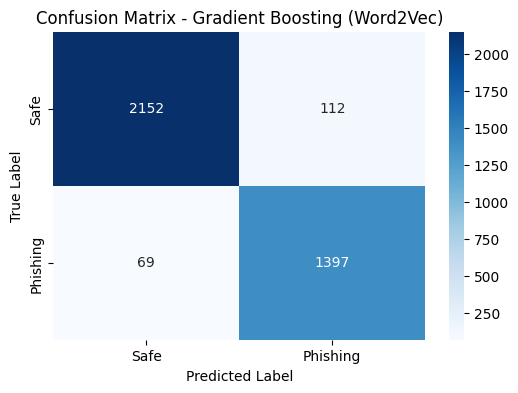

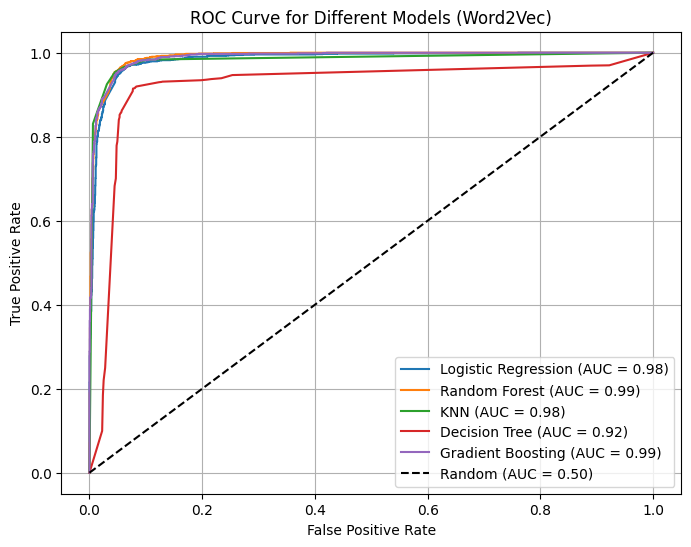


Training and Testing Times (Word2Vec):
----------------------------------------
Logistic Regression: Training Time = 1.8553s, Testing Time = 0.0044s
Random Forest: Training Time = 248.9759s, Testing Time = 0.2429s
KNN: Training Time = 4.7209s, Testing Time = 0.9633s
Decision Tree: Training Time = 26.6442s, Testing Time = 0.0022s
Gradient Boosting: Training Time = 765.9362s, Testing Time = 0.0331s


In [15]:

import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np

# Tokenize the clean text for Word2Vec
# Assuming 'df' and 'clean_text' column exist from previous steps
tokenized_text = [text.split() for text in df['clean_text']]

# Train a Word2Vec model
# You can adjust parameters like vector_size, window, min_count, workers
embedding_dim = 100  # Define the dimensionality of word vectors
w2v_model = Word2Vec(sentences=tokenized_text, vector_size=embedding_dim, window=5, min_count=1, workers=4)

# Function to average word vectors for a document
def document_vector(doc, model):
    # remove out-of-vocabulary words
    words = [word for word in doc.split() if word in model.wv]
    if len(words) == 0:
        return np.zeros(model.wv.vector_size)
    # Average the vectors of words in the document
    return np.mean(model.wv[words], axis=0)

# Create document vectors for the entire dataset
X_w2v = np.vstack([document_vector(text, w2v_model) for text in df['clean_text']])

# Split data using the new Word2Vec features
# Assuming 'y' is already defined and encoded from previous steps
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store results for Word2Vec models
results_w2v = {}

# Define models and their parameter grids for hyperparameter tuning

models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {'C': [0.1, 1, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
    },
    # MultinomialNB is not suitable for negative or non-integer input like W2V embeddings
    # 'Naive Bayes': {
    #     'model': MultinomialNB(),
    #     'params': {'alpha': [0.1, 0.5, 1.0]}
    # },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}


# Train and evaluate each model with Word2Vec features
for name, config in models.items():
    print(f"Training {name} with Word2Vec features...")
    model = config['model']
    params = config['params']

    # Hyperparameter Tuning with GridSearchCV
    start_time_train = time.time()
    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_w2v, y_train)
    end_time_train = time.time()
    train_time = end_time_train - start_time_train

    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Prediction and Evaluation
    start_time_test = time.time()
    y_pred = best_model.predict(X_test_w2v)
    # Ensure predict_proba is available for the model (some models like LinearSVC don't have it)
    if hasattr(best_model, 'predict_proba'):
        y_prob = best_model.predict_proba(X_test_w2v)[:, 1]
    else:
        # For models without predict_proba (e.g., LinearSVC if added), skip ROC plotting for this model
        y_prob = None
    end_time_test = time.time()
    test_time = end_time_test - start_time_test


    # Store results
    results_w2v[name] = {
        'best_model': best_model,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_test': y_test,
        'y_prob': y_prob,
        'train_time': train_time,
        'test_time': test_time
    }

    # Print classification report
    print(f"\nClassification Report for {name} (Word2Vec):\n{results_w2v[name]['classification_report']}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(results_w2v[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
    plt.title(f'Confusion Matrix - {name} (Word2Vec)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot ROC curves for all models trained with Word2Vec
plt.figure(figsize=(8, 6))
for name, res in results_w2v.items():
    if res['y_prob'] is not None: # Only plot if predict_proba was available
        fpr, tpr, _ = roc_curve(res['y_test'], res['y_prob'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models (Word2Vec)')
plt.legend()
plt.grid(True)
plt.show()

# Compare Training and Testing Times for Word2Vec models
print("\nTraining and Testing Times (Word2Vec):")
print("-" * 40)
for name, res in results_w2v.items():
    print(f"{name}: Training Time = {res['train_time']:.4f}s, Testing Time = {res['test_time']:.4f}s")



--2025-07-06 09:05:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-07-06 09:05:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-07-06 09:05:43--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

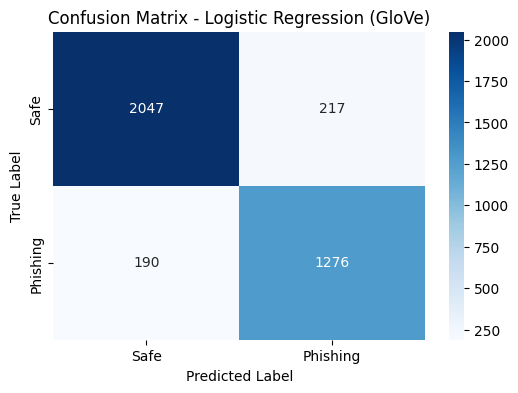

Training Random Forest with GloVe features...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}

Classification Report for Random Forest (GloVe):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2264
           1       0.91      0.91      0.91      1466

    accuracy                           0.93      3730
   macro avg       0.92      0.92      0.92      3730
weighted avg       0.93      0.93      0.93      3730



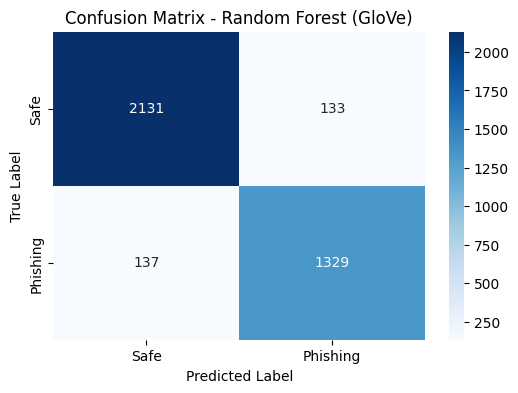

Training KNN with GloVe features...
Best parameters for KNN: {'n_neighbors': 3}

Classification Report for KNN (GloVe):
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2264
           1       0.89      0.92      0.90      1466

    accuracy                           0.92      3730
   macro avg       0.92      0.92      0.92      3730
weighted avg       0.92      0.92      0.92      3730



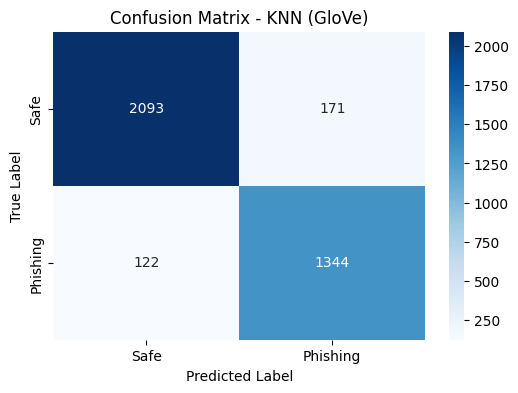

Training Decision Tree with GloVe features...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}

Classification Report for Decision Tree (GloVe):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2264
           1       0.80      0.80      0.80      1466

    accuracy                           0.84      3730
   macro avg       0.84      0.84      0.84      3730
weighted avg       0.84      0.84      0.84      3730



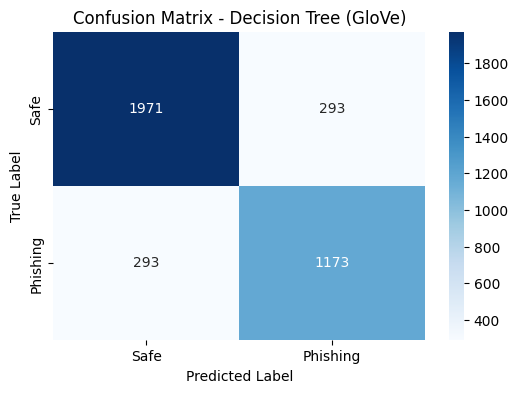

Training Gradient Boosting with GloVe features...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 200}

Classification Report for Gradient Boosting (GloVe):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2264
           1       0.90      0.92      0.91      1466

    accuracy                           0.93      3730
   macro avg       0.92      0.92      0.92      3730
weighted avg       0.93      0.93      0.93      3730



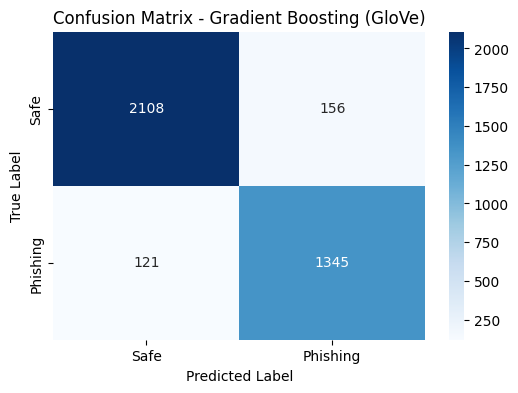

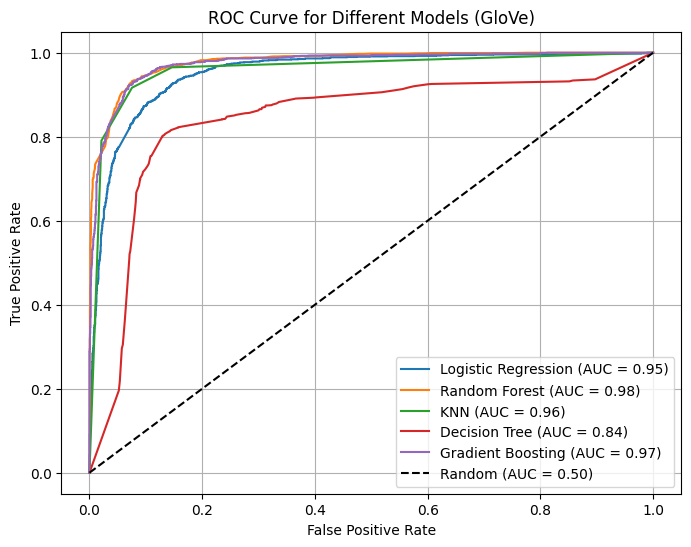


Training and Testing Times (GloVe):
----------------------------------------
Logistic Regression: Training Time = 2.9979s, Testing Time = 0.0032s
Random Forest: Training Time = 278.9729s, Testing Time = 0.2136s
KNN: Training Time = 4.6510s, Testing Time = 1.6728s
Decision Tree: Training Time = 24.4779s, Testing Time = 0.0024s
Gradient Boosting: Training Time = 796.8368s, Testing Time = 0.0422s


In [16]:
import matplotlib.pyplot as plt
import numpy as np
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

# Load the GloVe embeddings into a dictionary
# Using the 100d version as it's common and manageable
glove_file = 'glove.6B.100d.txt'
glove_embeddings = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} GloVe embeddings.")
print(f"Embedding dimension: {len(list(glove_embeddings.values())[0])}")

# Function to average GloVe vectors for a document
def document_vector_glove(doc, embeddings, dim):
    words = [word for word in doc.split() if word in embeddings]
    if len(words) == 0:
        return np.zeros(dim)
    # Average the vectors of words in the document
    return np.mean([embeddings[word] for word in words], axis=0)

# Define the embedding dimension based on the loaded GloVe file
glove_embedding_dim = len(list(glove_embeddings.values())[0])

# Create document vectors for the entire dataset using GloVe
X_glove = np.vstack([document_vector_glove(text, glove_embeddings, glove_embedding_dim) for text in df['clean_text']])

# Split data using the new GloVe features
X_train_glove, X_test_glove, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42, stratify=y)

# Dictionary to store results for GloVe models
results_glove = {}


models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=10000), # Increased max_iter for convergence
        'params': {'C': [0.1, 1, 10]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [3, 5, 7]}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
    }
}

# Train and evaluate each model with GloVe features
for name, config in models.items():
    print(f"Training {name} with GloVe features...")
    model = config['model']
    params = config['params']

    # Hyperparameter Tuning with GridSearchCV
    start_time_train = time.time()
    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_glove, y_train)
    end_time_train = time.time()
    train_time = end_time_train - start_time_train

    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Prediction and Evaluation
    start_time_test = time.time()
    y_pred = best_model.predict(X_test_glove)
    # Ensure predict_proba is available for the model
    if hasattr(best_model, 'predict_proba'):
        y_prob = best_model.predict_proba(X_test_glove)[:, 1]
    else:
        y_prob = None # Skip ROC plotting if not available
    end_time_test = time.time()
    test_time = end_time_test - start_time_test

    # Store results
    results_glove[name] = {
        'best_model': best_model,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_test': y_test,
        'y_prob': y_prob,
        'train_time': train_time,
        'test_time': test_time
    }

    # Print classification report
    print(f"\nClassification Report for {name} (GloVe):\n{results_glove[name]['classification_report']}")

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(results_glove[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Safe', 'Phishing'], yticklabels=['Safe', 'Phishing'])
    plt.title(f'Confusion Matrix - {name} (GloVe)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot ROC curves for all models trained with GloVe
plt.figure(figsize=(8, 6))
for name, res in results_glove.items():
    if res['y_prob'] is not None: # Only plot if predict_proba was available
        fpr, tpr, _ = roc_curve(res['y_test'], res['y_prob'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models (GloVe)')
plt.legend()
plt.grid(True)
plt.show()

# Compare Training and Testing Times for GloVe models
print("\nTraining and Testing Times (GloVe):")
print("-" * 40)
for name, res in results_glove.items():
    print(f"{name}: Training Time = {res['train_time']:.4f}s, Testing Time = {res['test_time']:.4f}s")